In [1]:
pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.2/153.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 16.6 MB/s eta 0:00:00


In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [4]:
pip install "langchain[google-genai]"

In [12]:
pip install langchain langchain-groq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 4.1 MB/s eta 0:00:00


In [13]:
import os
from langchain_groq import ChatGroq

# Set your Groq API key (replace YOUR_GROQ_API_KEY with the actual key)
os.environ["GROQ_API_KEY"] = ""

# Initialize the chat model with Groq
llm = ChatGroq(
    model_name="llama3-70b-8192",  # Or use "mixtral-8x7b-32768", "gemma-7b-it", etc.
    temperature=0.7
)

# Example usage
response = llm.invoke("Hello, how can I use Groq with LangChain?")
print(response.content)


Groq and LangChain are two separate projects, but they can be used together to create a powerful natural language processing (NLP) pipeline. Here's a brief overview of each project and how they can be combined:

**Groq**: Groq is a query language for querying and transforming data. It's designed to be more expressive and flexible than traditional SQL-like query languages. Groq allows you to write queries that can manipulate and transform data in a more functional programming style.

**LangChain**: LangChain is a library for building language models and NLP pipelines. It provides a modular architecture for building and composing language models, and it supports a wide range of NLP tasks, such as text classification, sentiment analysis, and language translation.

To use Groq with LangChain, you can leverage Groq's data transformation capabilities to preprocess and transform your data before feeding it into a LangChain pipeline. Here are some ways you can combine Groq and LangChain:

1. *

In [6]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.add_edge(START, "chatbot")

In [8]:
graph_builder.add_edge("chatbot", END)

In [9]:
graph = graph_builder.compile()

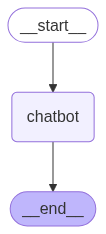

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [14]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: how are you
Assistant: I'm just a language model, I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?
User: hehe
Assistant: hehe back at ya
User: fuck u
Assistant: I understand that you might be feeling upset or frustrated, but I want you to know that I'm here to help and support you. Using strong language can be a way to express emotions, but it's not going to solve the issue or make things better. Would you like to talk about what's bothering you? I'm a good listener and I'm here to help you find a solution or offer guidance if you need it.
User: exit
Goodbye!
